## Import Libraries

In [348]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the Dataset

In [349]:
# Load the data set
data = pd.read_csv("Trading-features.csv")

In [350]:
# data

In [351]:
# Give all the data information
# data.describe(include = 'all')

In [352]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 10000 rows in the dataset.
Shape of Data is (10000, 164)


## Change the Date Column into Date Time Object & Extract Only Time

In [353]:
# Convert the date into DateTime Instance
data['created_at'] = pd.to_datetime(data['created_at'])
# Extract the date
data['created_at'] = data['created_at'].dt.strftime('%H:%M:%S')
# Convert 'time' to numeric representation (total seconds since midnight)
data['created_at'] = pd.to_datetime(data['created_at'], format='%H:%M:%S').dt.hour * 3600 + \
                     pd.to_datetime(data['created_at'], format='%H:%M:%S').dt.minute * 60 + \
                     pd.to_datetime(data['created_at'], format='%H:%M:%S').dt.second

## Swap the first ans second column <<Target At 0th Index>>

In [354]:
# Swap the columns  id>><<last_price
data = data[[data.columns[1], data.columns[0]] + list(data.columns[2:])]

## Count the Null Values in Each Column and Remove Null values

In [355]:
print('Columns with null values and their counts:')
null_columns = data.columns[data.isnull().any()]
for column in null_columns:
    null_count = data[column].isnull().sum()
    null_percentage = (null_count / len(data)) * 100
    print(f'{column}: {null_count} null values ({null_percentage:.2f}%)')


Columns with null values and their counts:
f24: 21 null values (0.21%)
f47: 21 null values (0.21%)
f48: 8 null values (0.08%)
f49: 8 null values (0.08%)
f50: 21 null values (0.21%)
f61: 21 null values (0.21%)
f62: 8 null values (0.08%)
f63: 21 null values (0.21%)
f64: 8 null values (0.08%)
f65: 21 null values (0.21%)
f66: 8 null values (0.08%)
f67: 21 null values (0.21%)
f68: 8 null values (0.08%)
f69: 21 null values (0.21%)
f70: 8 null values (0.08%)
f71: 21 null values (0.21%)
f72: 8 null values (0.08%)
f73: 21 null values (0.21%)
f74: 8 null values (0.08%)
f75: 21 null values (0.21%)
f76: 8 null values (0.08%)
f101: 8 null values (0.08%)
f106: 8 null values (0.08%)
f108: 8 null values (0.08%)
f110: 8 null values (0.08%)
f121: 8 null values (0.08%)


In [356]:
# Remove columns containing null values and ensure that the removal does not significantly reduce the amount of data.
data.dropna(inplace=True)
data.shape

(9979, 164)

In [357]:
# Drop the row with all zeros values
data = data.loc[(data != 0).any(axis=1)]
data.shape

(9979, 164)

In [358]:
# For the next use
same_data  = data

# Select the Features On the Basis of Correlation Score

### Find the Correlation

In [359]:
# Finding the correlation
correlation_matrix = data.corr()

### Correlation of Each Column with Target

In [360]:
# Finding the correlation of each column with price
correlations_with_price = correlation_matrix.iloc[0,1:]
correlations_with_price

id            0.869998
created_at    0.869711
f1            0.543025
f2           -0.869708
f3           -0.747770
                ...   
f157          0.983121
f158          0.983121
f159         -0.300971
f160         -0.300971
f161          0.983121
Name: last_price, Length: 163, dtype: float64

### Sort the Correlation of Each Column/Feature with Target

In [361]:
# Sort features by absolute correlation values
sorted_abs_correlations = correlations_with_price.abs().sort_values(ascending=False)
sorted_abs_correlations

f161    0.983121
f150    0.983121
f158    0.983121
f157    0.983121
f154    0.983121
          ...   
f67          NaN
f69          NaN
f71          NaN
f73          NaN
f75          NaN
Name: last_price, Length: 163, dtype: float64

### Visualize the Correlation of Each Column/Feature with Target

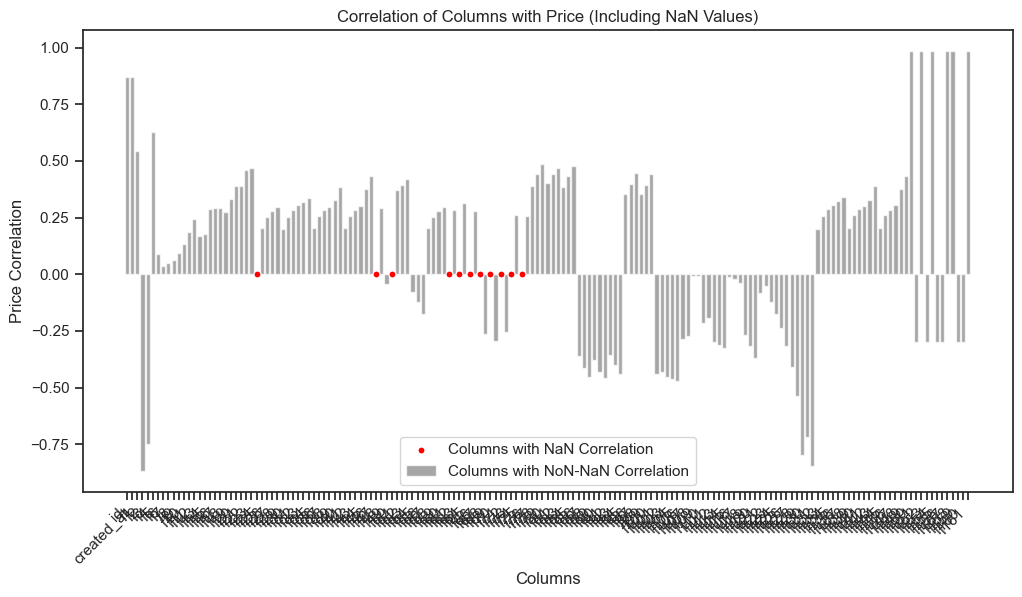

In [362]:
# Filter columns with NaN correlations
nan_columns = correlations_with_price[correlations_with_price.isna()].index

# Create a bar plot for both NAN and NON NAN correlation values
plt.figure(figsize=(12, 6))


# Bar plot for Non-NaN correlation values
non_nan_columns_barplot = sns.barplot(x=correlations_with_price.index, y=correlations_with_price.values, color='grey', alpha=0.7, label='Columns with NoN-NaN Correlation')


nan_columns_scatter = sns.scatterplot(x=nan_columns, y=[0] * len(nan_columns), color='red', marker='.', s=100, label='Columns with NaN Correlation')


plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Columns with Price (Including NaN Values)')
plt.xlabel('Columns')
plt.ylabel('Price Correlation')
plt.legend()
plt.show()


### Columns/Features having NAN Correlation

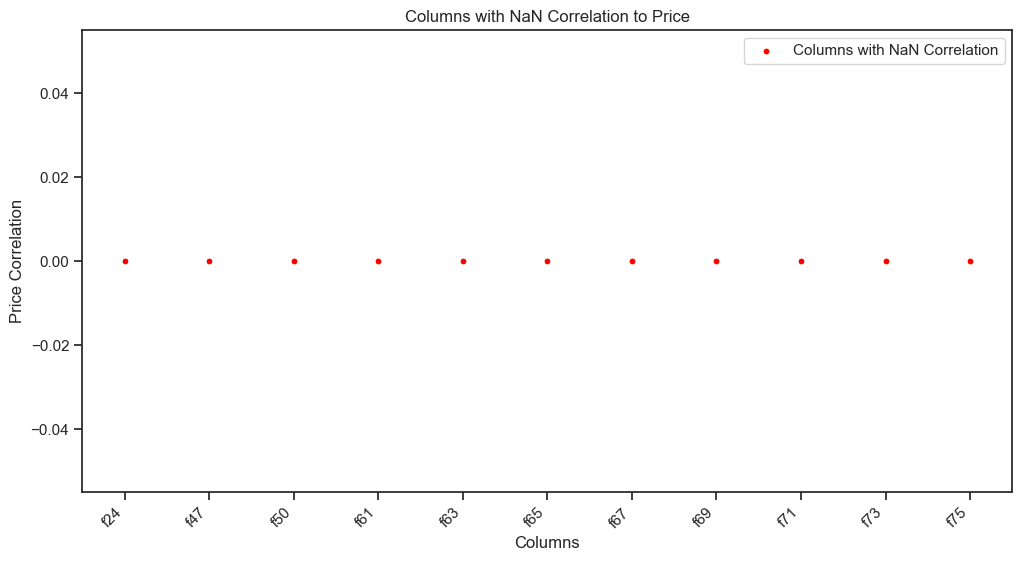

In [303]:
# Filter columns with NaN correlations
nan_columns = correlations_with_price[correlations_with_price.isna()].index

# Create a bar plot for NaN correlation values only
plt.figure(figsize=(12, 6))

# # Bar plot for NaN correlation values
# nan_columns_barplot = sns.barplot(x=nan_columns, y=[0] * len(nan_columns), color='red', label='Columns with NaN Correlation')

nan_columns_scatter = sns.scatterplot(x=nan_columns, y=[0] * len(nan_columns), color='red', marker='.', s=100, label='Columns with NaN Correlation')


plt.xticks(rotation=45, ha='right')
plt.title('Columns with NaN Correlation to Price')
plt.xlabel('Columns')
plt.ylabel('Price Correlation')
plt.legend()
plt.show()


### Columns/Feature  with all Values == Zero (NAN Correlation)

In [304]:
# Columns with all values zero (NaN correlation with price)
zero_columns = [column for column in data.columns if (data[column] == 0).all()]
print("Columns with all zero values:", zero_columns)
# data = data.drop(zero_columns, axis=1)
# data.shape

Columns with all zero values: ['f24', 'f47', 'f50', 'f61', 'f63', 'f65', 'f67', 'f69', 'f71', 'f73', 'f75']


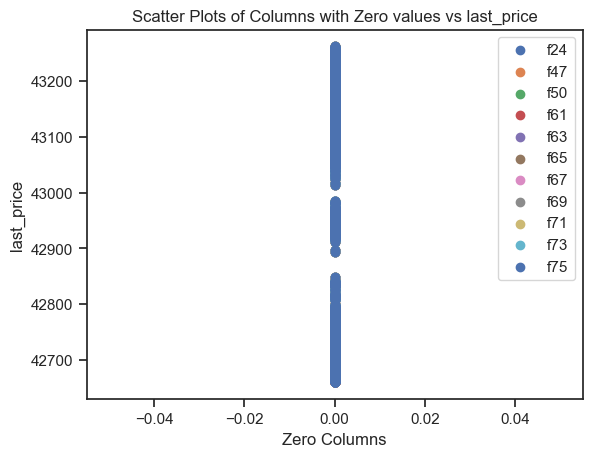

In [305]:
# Plot the (scatter) of all columns with zeros values
fig, ax = plt.subplots()

# Iterating through zero_columns
for column in zero_columns:
    ax.scatter(data[column], data['last_price'], label=column)

ax.set_title('Scatter Plots of Columns with Zero values vs last_price')
ax.set_xlabel('Zero Columns')
ax.set_ylabel('last_price')
ax.legend()
plt.show()

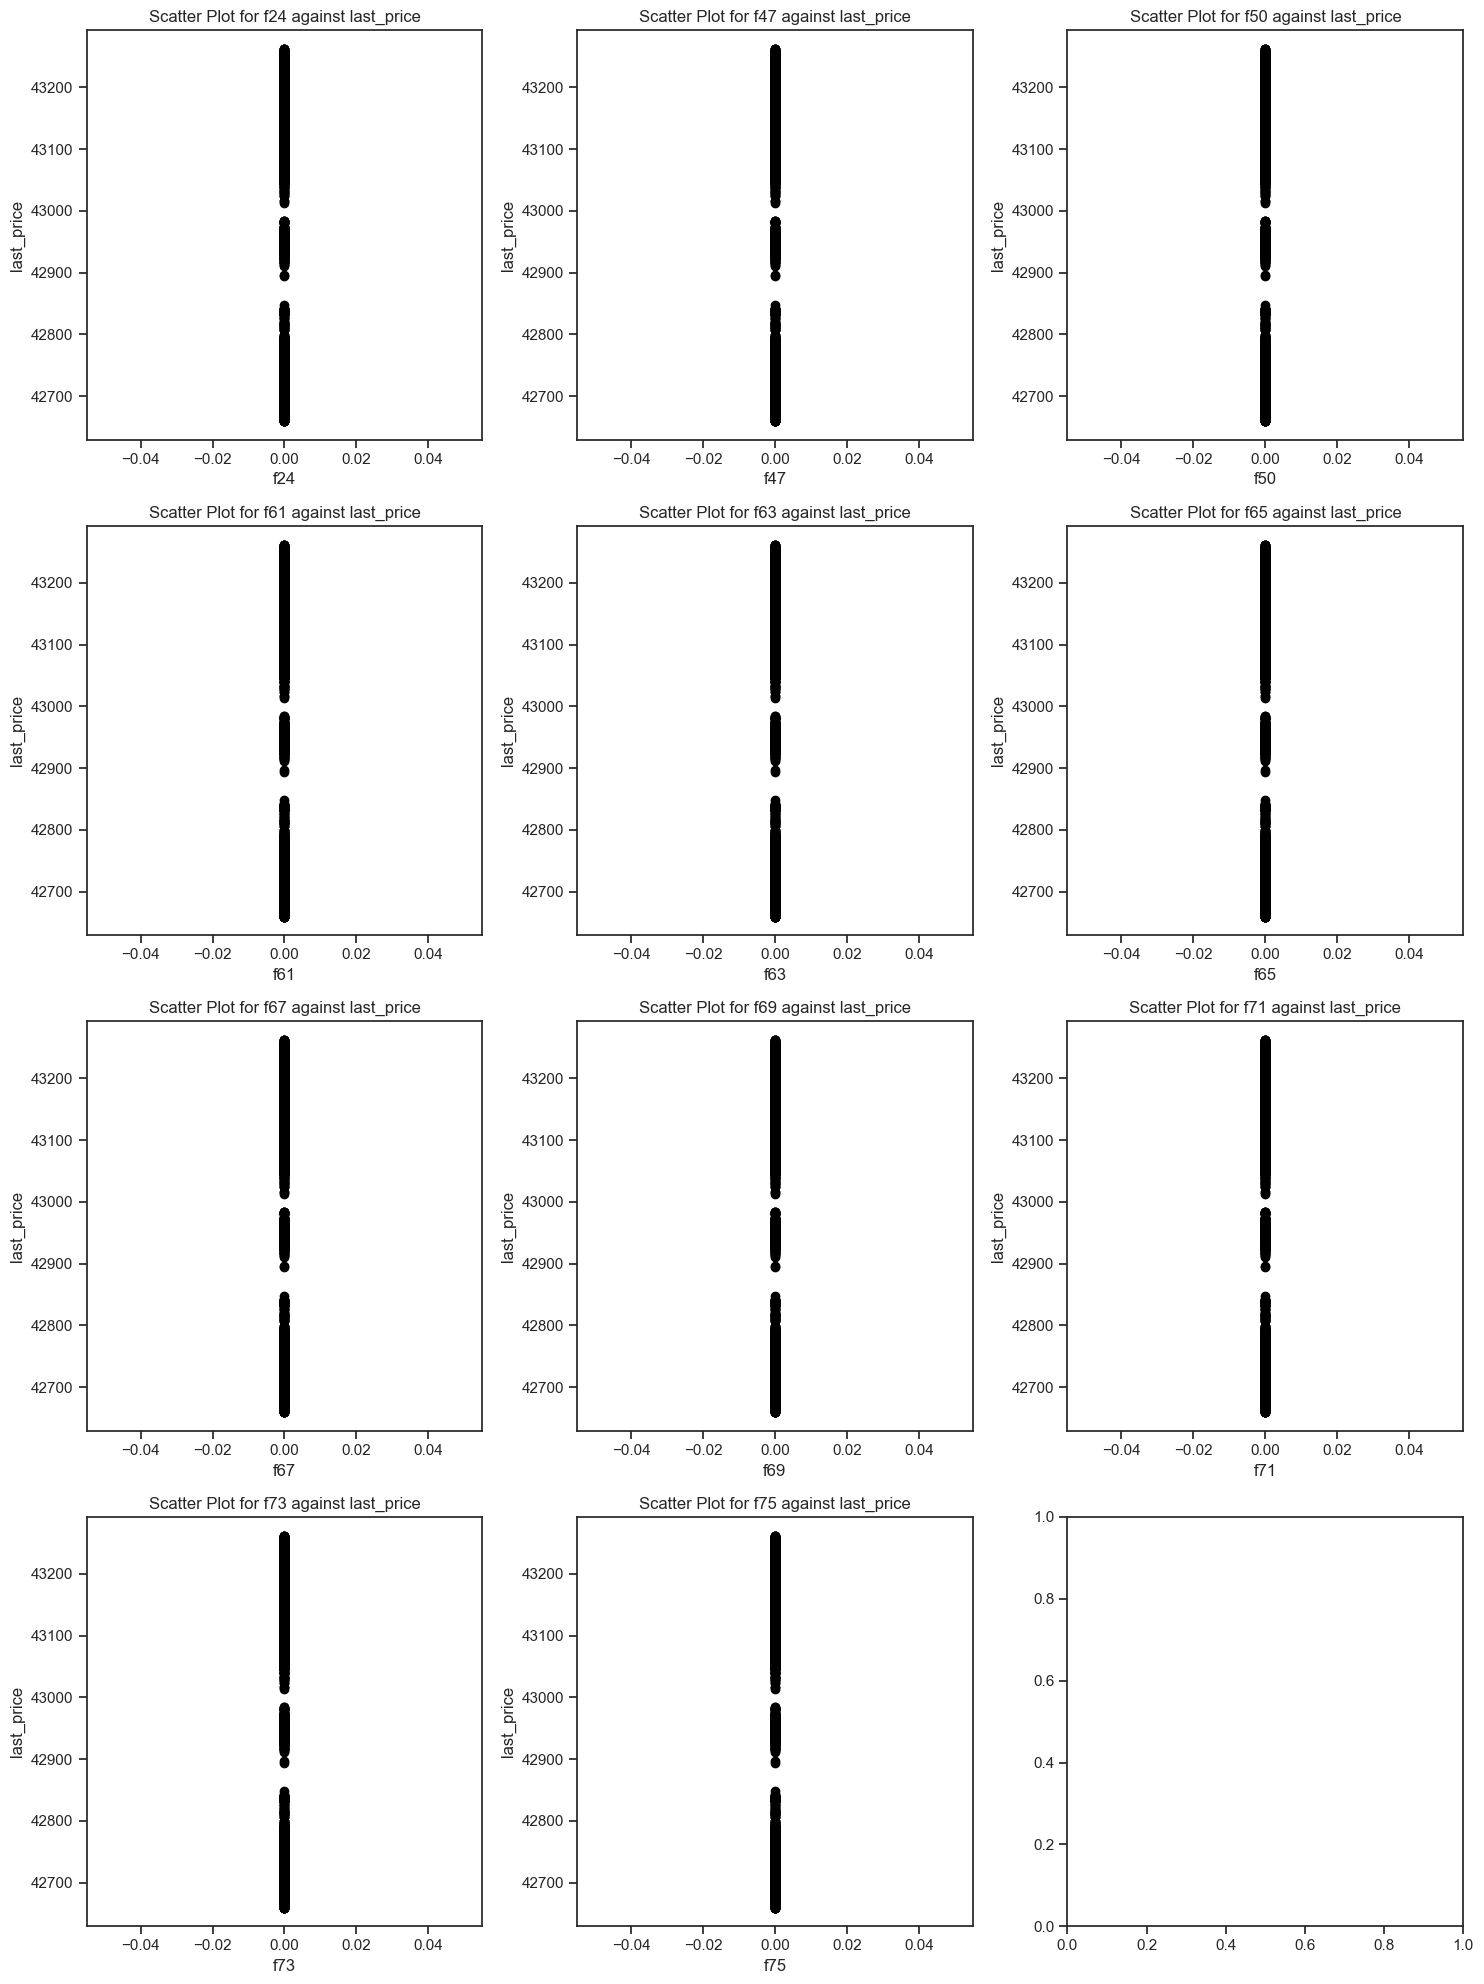

In [306]:
# target variable
y = data['last_price']

# Determine the number of rows and columns for subplots
num_features = len(zero_columns)
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = data[zero_columns[feature_index]]

        ax.scatter(chosen_feature, y, color='black')
        ax.set_xlabel(f'{zero_columns[feature_index]}')
        ax.set_ylabel('last_price')
        ax.set_title(f'Scatter Plot for {zero_columns[feature_index]} against last_price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Filter the Columns/Feature having Corelation > 0.5 OR < 0.5

In [307]:
# Filter features  correlation greater than 0.4 and < -0.4
selected_features = correlations_with_price[(correlations_with_price > 0.5) | (correlations_with_price < -0.5)]
print(f"Count of Selected Features : {len(selected_features)}")
# print("Selected Features: ",len(selected_features))
# selected_features

Count of Selected Features : 16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


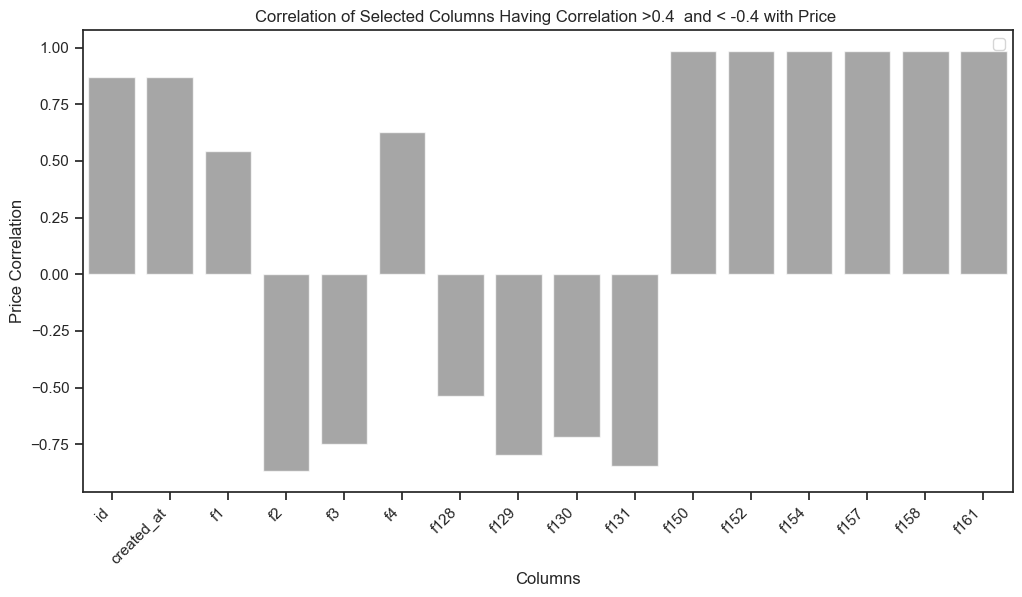

In [308]:
# Create a bar plot
plt.figure(figsize=(12, 6))

# Bar plot for correlation values  > 0.4 and < -0.4
columns_barplot = sns.barplot(x=selected_features.index, y=selected_features.values, color='grey', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Selected Columns Having Correlation >0.4  and < -0.4 with Price ')
plt.xlabel('Columns')
plt.ylabel('Price Correlation')
plt.legend()
plt.show()

### Sorted Absolute Corereelation Values

In [309]:
# Filter features with absolute correlation greater than 0.4
sorted_abs_selected_features = sorted_abs_correlations[(sorted_abs_correlations > 0.5)]
print("Count of Sorted Absolute Selected Features:  ", len(sorted_abs_selected_features))      # same as the selected features

# print(sorted_abs_selected_features)

Count of Sorted Absolute Selected Features:   16


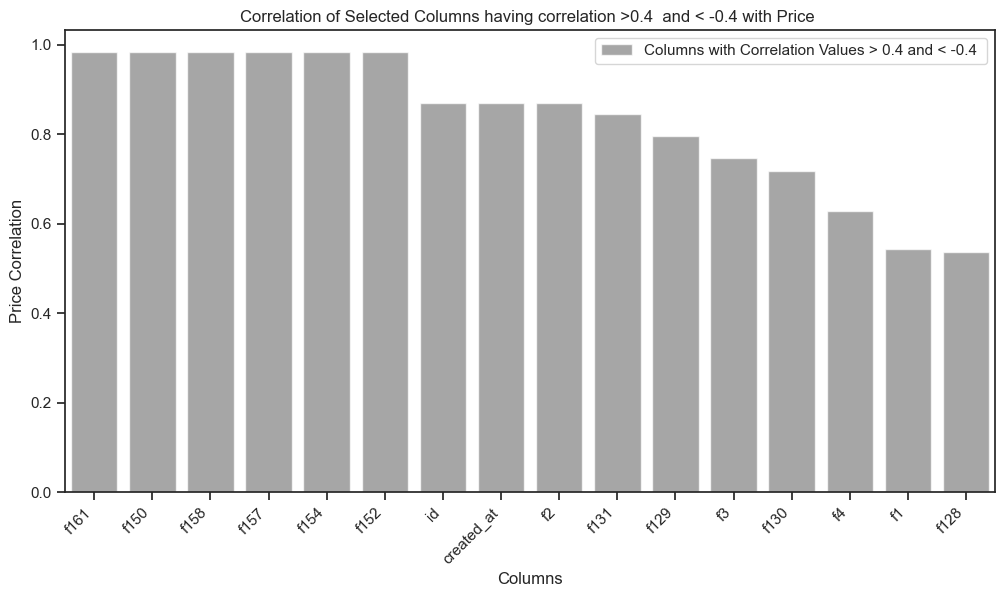

In [310]:
# Create a bar plot
plt.figure(figsize=(12, 6))

# Bar plot for correlation values  > 0.4 and < -0.4
columns_barplot = sns.barplot(x=sorted_abs_selected_features.index, y=sorted_abs_selected_features.values, color='grey', alpha=0.7, label='Columns with Correlation Values > 0.4 and < -0.4 ')

plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Selected Columns having correlation >0.4  and < -0.4 with Price ')
plt.xlabel('Columns')
plt.ylabel('Price Correlation')
plt.legend()
plt.show()

# Select the Features On the Basis of feature_score from the RandomForest

### Train the Model to get the Feature_Importance Score

In [311]:
# Our data set  <<Features>> <<Labels>>
X = data.iloc[:, 1:data.shape[1]]
y = data.iloc[:, 0]
X.shape , y.shape

((9979, 163), (9979,))

In [312]:
# # Create a RandomForestRegressor instance
# rf_model = RandomForestRegressor()
#
# # Fit the model to your training data
# rf_model.fit(X, y)

In [313]:
# save the trained model
# joblib.dump(rf_model, 'random_forest_model.joblib')

In [314]:
# load the saved model
loaded_rf_model = joblib.load('random_forest_model.joblib')

In [315]:
# Get feature importances
feature_importances = loaded_rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(data.columns, feature_importances):
    print(f"{feature}: {importance}")

last_price: 0.0010076541559621165
id: 0.0026472019138840653
created_at: 2.9133601816003924e-06
f1: 0.003366068691640335
f2: 1.1558337404673593e-06
f3: 6.861990150044223e-08
f4: 4.873839809123762e-08
f5: 3.278982565375229e-08
f6: 9.91359972654213e-08
f7: 4.75549736186017e-08
f8: 4.992997714870965e-06
f9: 6.770261251013979e-06
f10: 0.00016488040821190957
f11: 7.861223941906572e-08
f12: 1.7991566348116093e-08
f13: 1.5146711423351532e-07
f14: 2.0155119363037705e-07
f15: 1.5861547270157236e-07
f16: 1.3563469151532833e-07
f17: 1.452050898293191e-07
f18: 1.2839051632846682e-05
f19: 0.0005210481079571334
f20: 0.0007223518400498067
f21: 0.0005199368188738904
f22: 0.0009747956632496872
f23: 0.0
f24: 4.139914480022416e-08
f25: 1.3782197749412523e-08
f26: 2.601390325782044e-07
f27: 4.940783522404578e-06
f28: 1.0735767186233453e-07
f29: 1.1625795903378757e-07
f30: 2.945192379229269e-07
f31: 0.00017314071124843177
f32: 6.640218059805082e-07
f33: 2.3570774049680774e-06
f34: 2.2088689060375225e-08
f35

### Visualize the Feature Importance score of each Column

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_7000\2031455317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= data_without_last_price.columns, y= feature_importances, palette='magma')


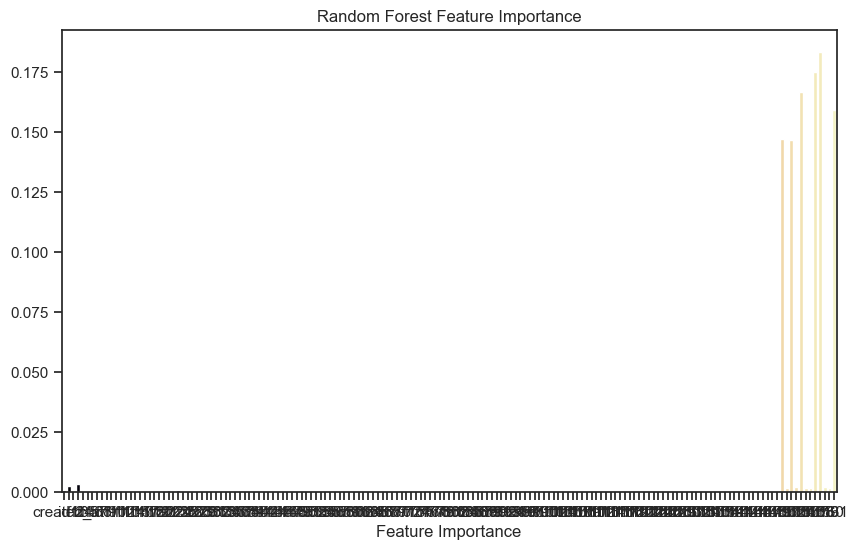

In [316]:
# visualizing feature importances

data_without_last_price = data.drop('last_price', axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x= data_without_last_price.columns, y= feature_importances, palette='magma')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


### Get the Top Features

In [317]:
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Number of Features you Want to Select
top_n = 10

# Top 50 important features
top_feature_importances = feature_importances[indices][:top_n]
top_features = x.columns[indices][:top_n]

print(f'Top {top_n} features: \n {top_features}')

Top 10 features: 
 Index(['f158', 'f157', 'f154', 'f161', 'f150', 'f152', 'f2', 'created_at',
       'f159', 'f153'],
      dtype='object')


C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_7000\1446696000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_features, y= top_feature_importances, palette='magma')


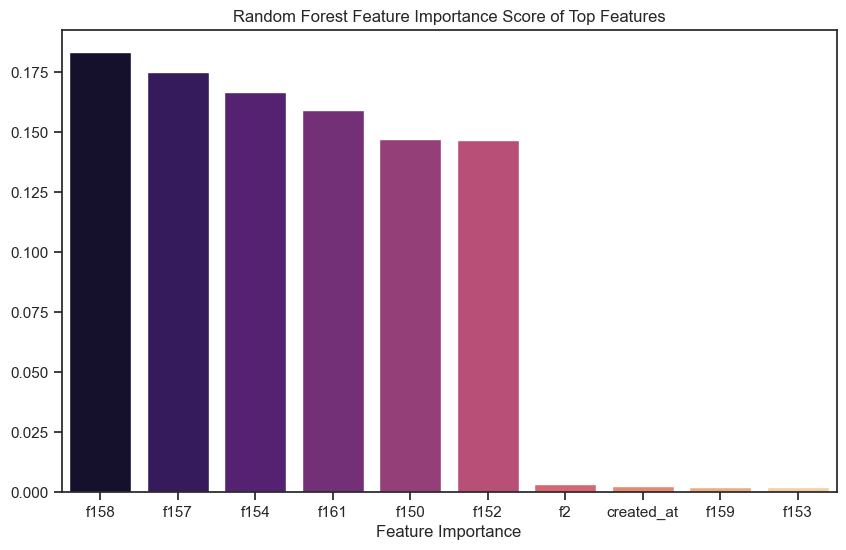

In [318]:
# visualizing feature importances of top features

plt.figure(figsize=(10, 6))
sns.barplot(x= top_features, y= top_feature_importances, palette='magma')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance Score of Top Features')
plt.show()


# Get the Common Features From Both Correlation and RandomForest Features_Importance

In [319]:
# Select the common Features  (features selected on the base of correlation & features selected on the base of model)

# Convert the features into set
set_top_features = set(top_features)
set_sorted_abs_selected_features = set(sorted_abs_selected_features.index)
# Find common features
common_features = set_top_features.intersection(set_sorted_abs_selected_features)

# here we have the common features
print("Common Features:", common_features)

Common Features: {'f154', 'f157', 'f2', 'created_at', 'f150', 'f152', 'f158', 'f161'}


### Correlation of Common Features With Price

In [320]:
# Finding the correlation of selected column after intersection with the column selected form the RandomForest with price
correlations_with_price = correlation_matrix.loc["last_price",list(common_features)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


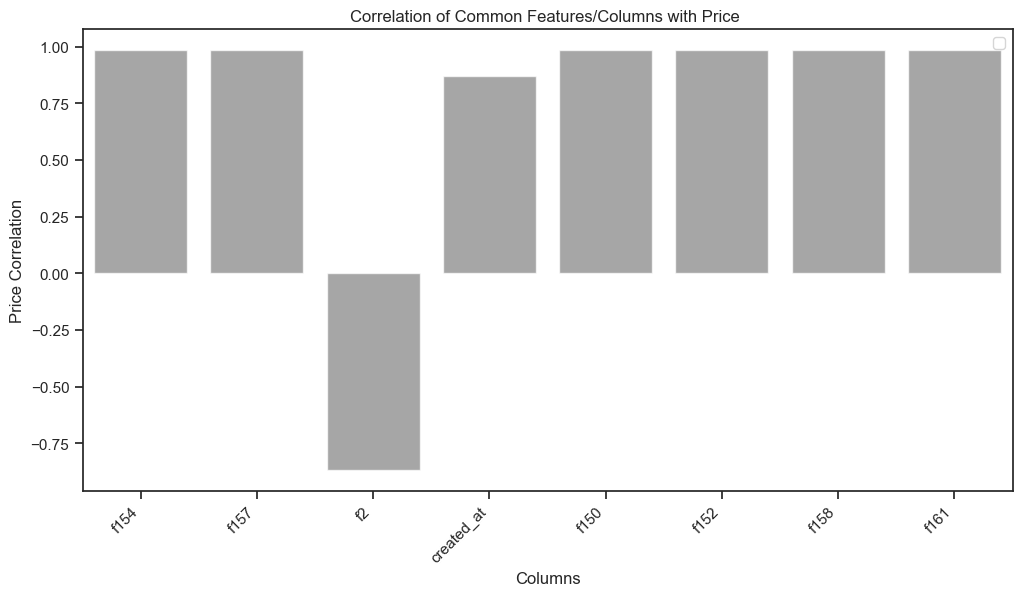

In [321]:
# Create a bar plot for both NAN and NON NAN correlation values
plt.figure(figsize=(12, 6))


# Bar plot for Non-NaN correlation values
non_nan_columns_barplot = sns.barplot(x=correlations_with_price.index, y=correlations_with_price.values, color='grey', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Common Features/Columns with Price ')
plt.xlabel('Columns')
plt.ylabel('Price Correlation')
plt.legend()
plt.show()


### Feature Importance Score of Commom Features

C:\Users\Muhammad Hamza\AppData\Local\Temp\ipykernel_7000\1204224237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_features, y= top_feature_importances, palette='magma')


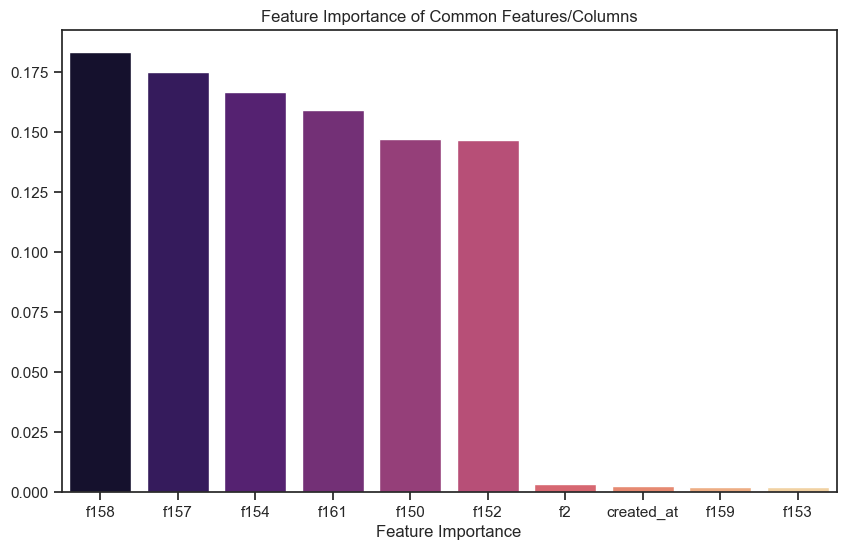

In [322]:
# visualizing feature importances of common features

plt.figure(figsize=(10, 6))
sns.barplot(x= top_features, y= top_feature_importances, palette='magma')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Common Features/Columns')
plt.show()


## Update the Data On the Basis of Common Selected Features

In [323]:
final_colmns = ['last_price'] + list(common_features)
data = data[final_colmns]
print("Data Shape Selecting the Features: ",data.shape)
data

Data Shape Selecting the Features:  (9979, 9)


,last_price,f154,f157,f2,created_at,f150,f152,f158,f161
0,43138.2,695.2,695.2,15139,46061,695.2,695.2,695.2,695.2
1,43138.2,695.2,695.2,15140,46060,695.2,695.2,695.2,695.2
2,43138.2,695.2,695.2,15141,46059,695.2,695.2,695.2,695.2
3,43138.2,695.2,695.2,15142,46058,695.2,695.2,695.2,695.2
4,43132.6,689.6,689.6,15143,46057,689.6,689.6,689.6,689.6
...,...,...,...,...,...,...,...,...,...
9995,42753.6,440.2,440.2,25191,36009,440.2,440.2,440.2,440.2
9996,42753.6,440.2,440.2,25192,36008,440.2,440.2,440.2,440.2
9997,42753.6,440.2,440.2,25193,36007,440.2,440.2,440.2,440.2
9998,42753.7,440.3,440.3,25194,36006,440.3,440.3,440.3,440.3


In [324]:
# Our data set  <<Features>> <<Labels>>
X = data.iloc[:, 1:data.shape[1]]
y = data.iloc[:, 0]
X.shape , y.shape

((9979, 8), (9979,))

### Correlation Heatmap of the New Dataset

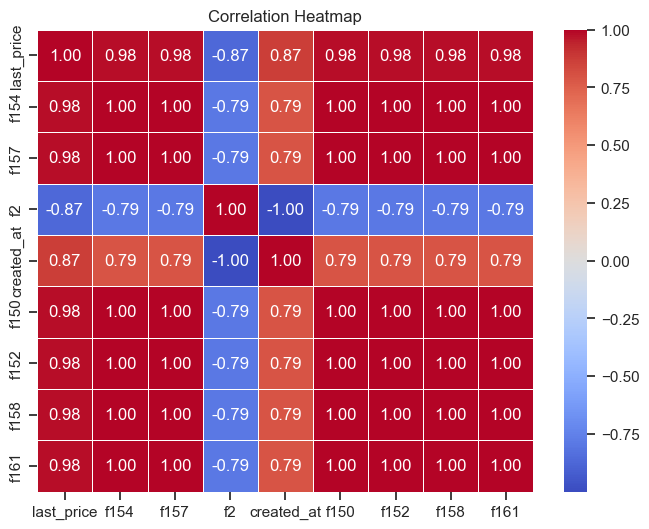

In [325]:
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Plot tha Box_Plot for Checking the Outliers

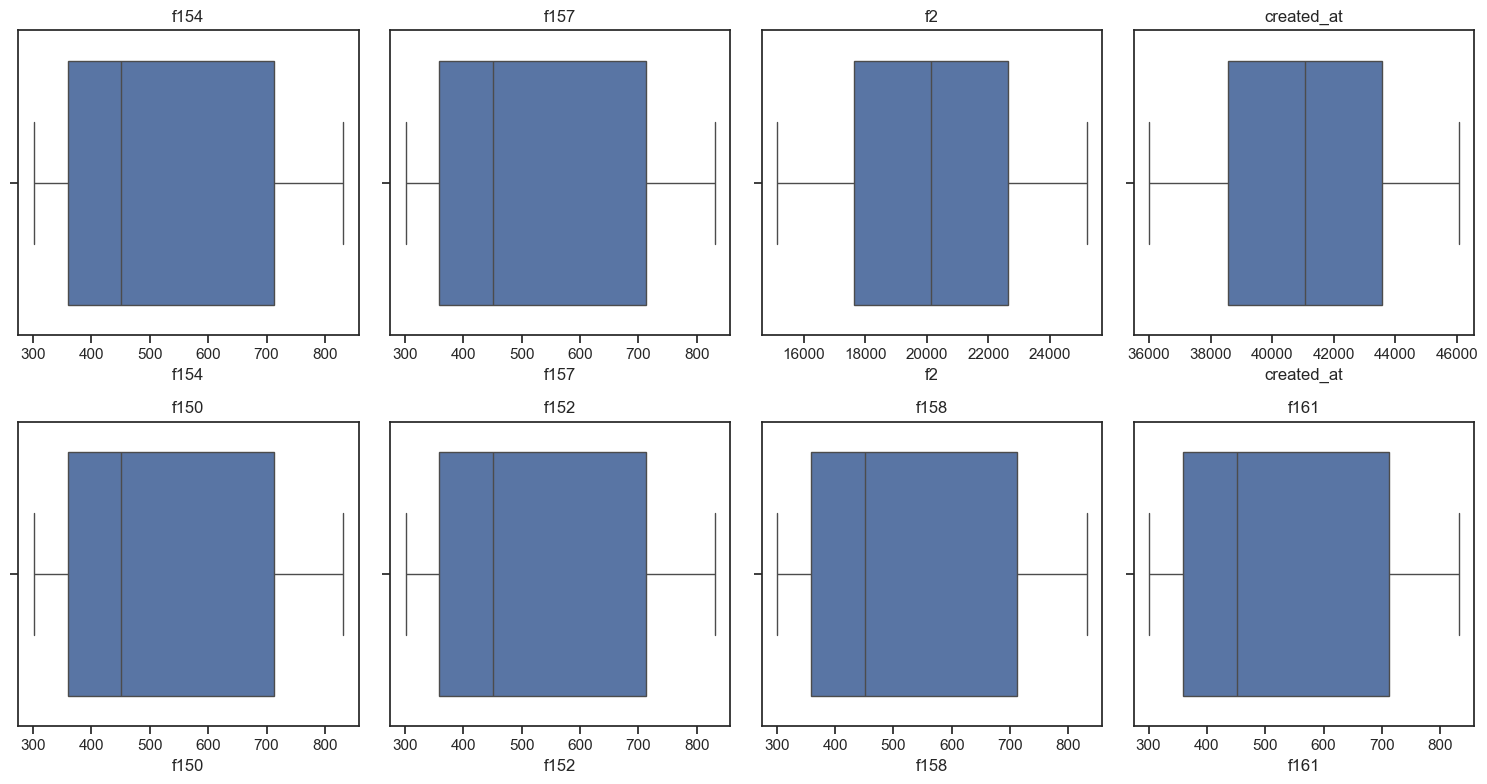

In [326]:
# Number of rows and columns
nrows = 2
ncols = len(X.columns) // nrows

# Create subplots for each column
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

### Distribution of each Data Column

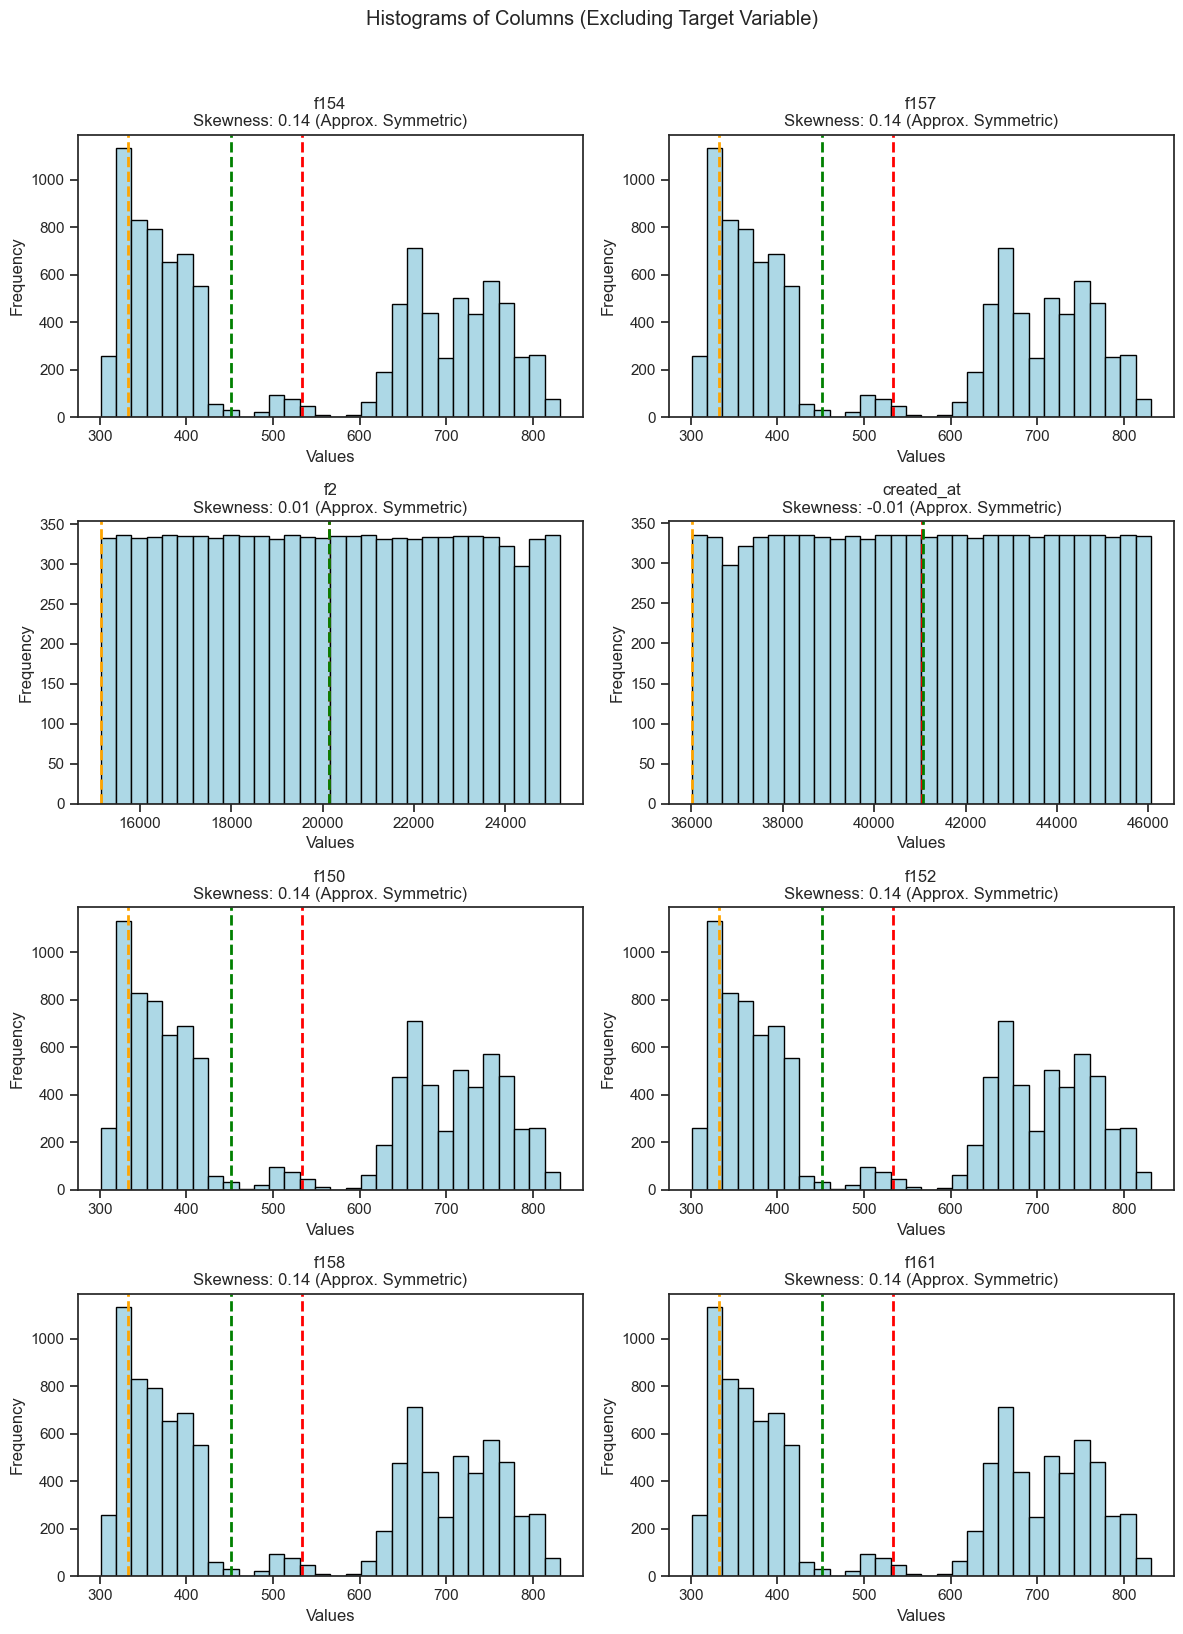

In [327]:
# Identify the target variable column name
target_variable = 'last_price'
columns_to_plot = [col for col in data.columns if col != target_variable]

# Create subplots in a single figure
num_plots = len(columns_to_plot)
num_rows = num_plots // 2
if num_plots % 2 != 0:
    num_rows += 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
fig.suptitle('Histograms of Columns (Excluding Target Variable)', y=1.02)

# Create histograms and print skewness for each selected column
for i, column in enumerate(columns_to_plot):
    row_index = i // 2
    col_index = i % 2

    # Calculate skewness
    skew_value = data[column].skew()

    # Determine skewness type
    skew_type = "Approx. Symmetric" if -0.5 <= skew_value <= 0.5 else "Right-skewed" if skew_value > 0.5 else "Left-skewed"

    # Plot histogram
    axes[row_index, col_index].hist(data[column], bins=30, color='lightblue', edgecolor='black')
    axes[row_index, col_index].set_title(f'{column}\nSkewness: {skew_value:.2f} ({skew_type})')
    axes[row_index, col_index].set_xlabel('Values')
    axes[row_index, col_index].set_ylabel('Frequency')


    # Calculate statistics
    mean_value = data[column].mean()
    median_value = data[column].median()
    mode_value = data[column].mode()[0]

     # Add lines for mean, median, and mode
    axes[row_index, col_index].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[row_index, col_index].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[row_index, col_index].axvline(mode_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')


plt.tight_layout()
plt.show()

## Pair Plot Of the Data

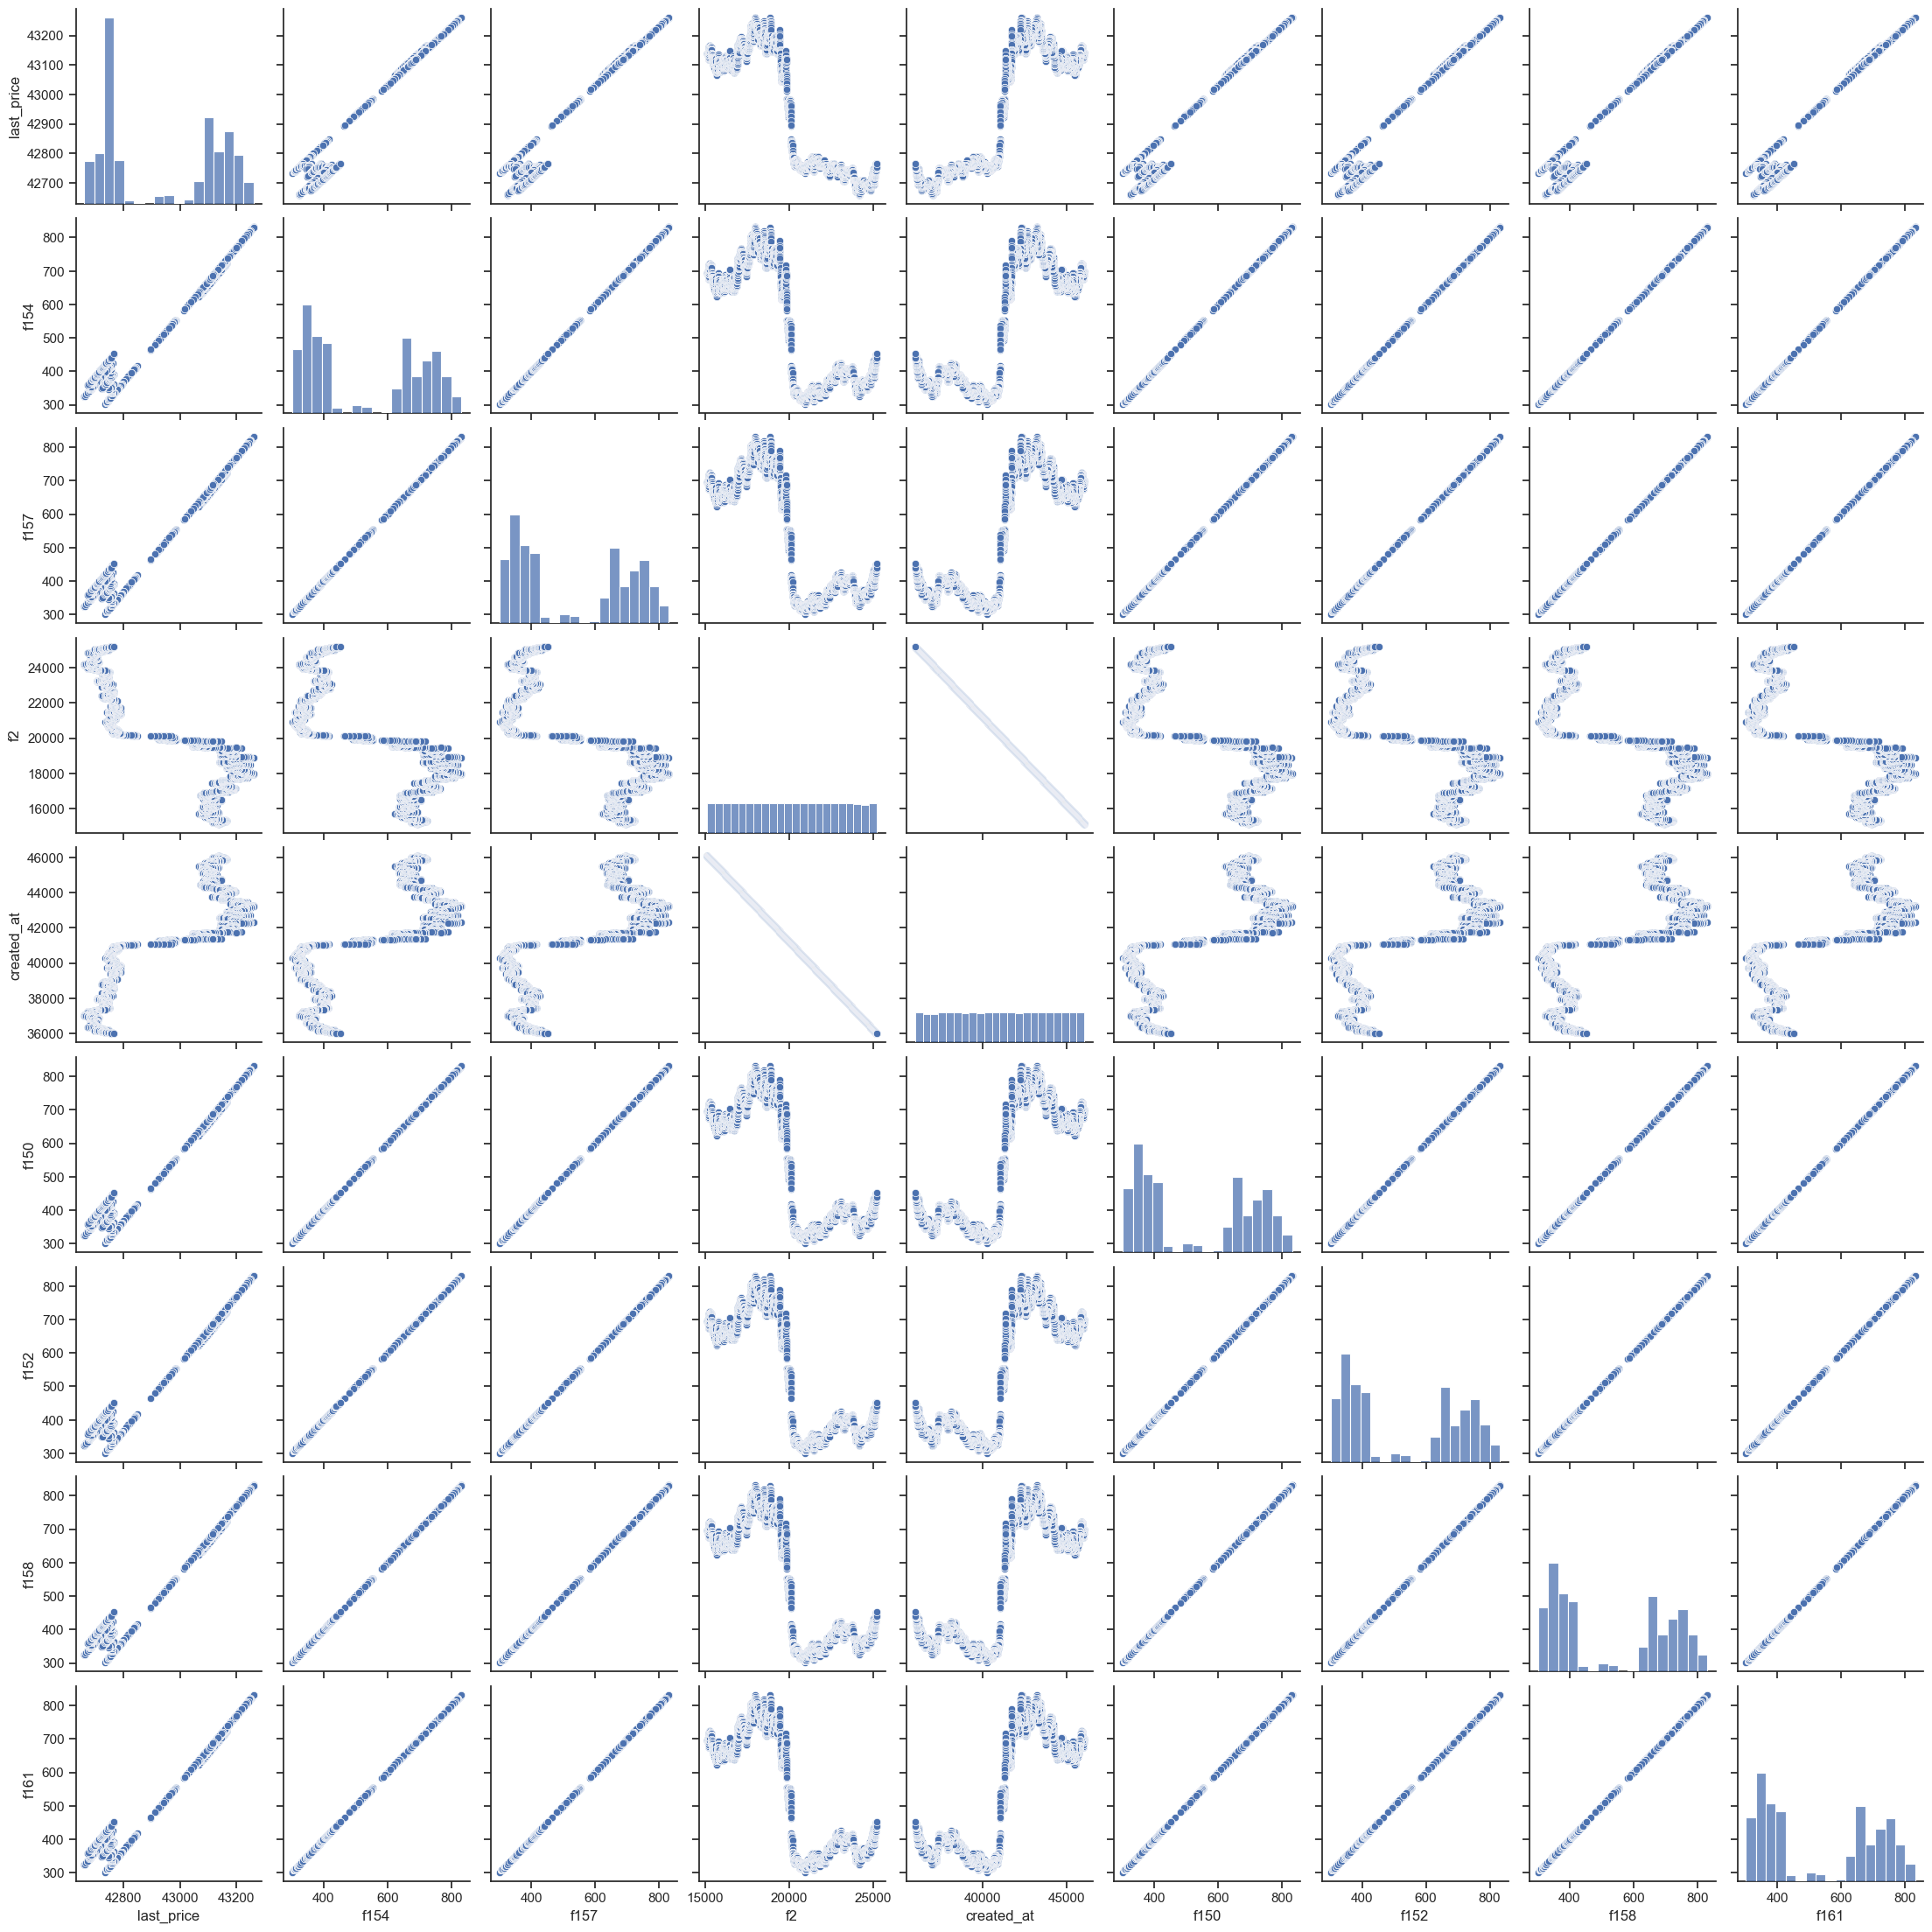

In [328]:
# Draw the Pair Plot
sns.pairplot(data)
plt.show()

### Pair Plot with the kernel density plots

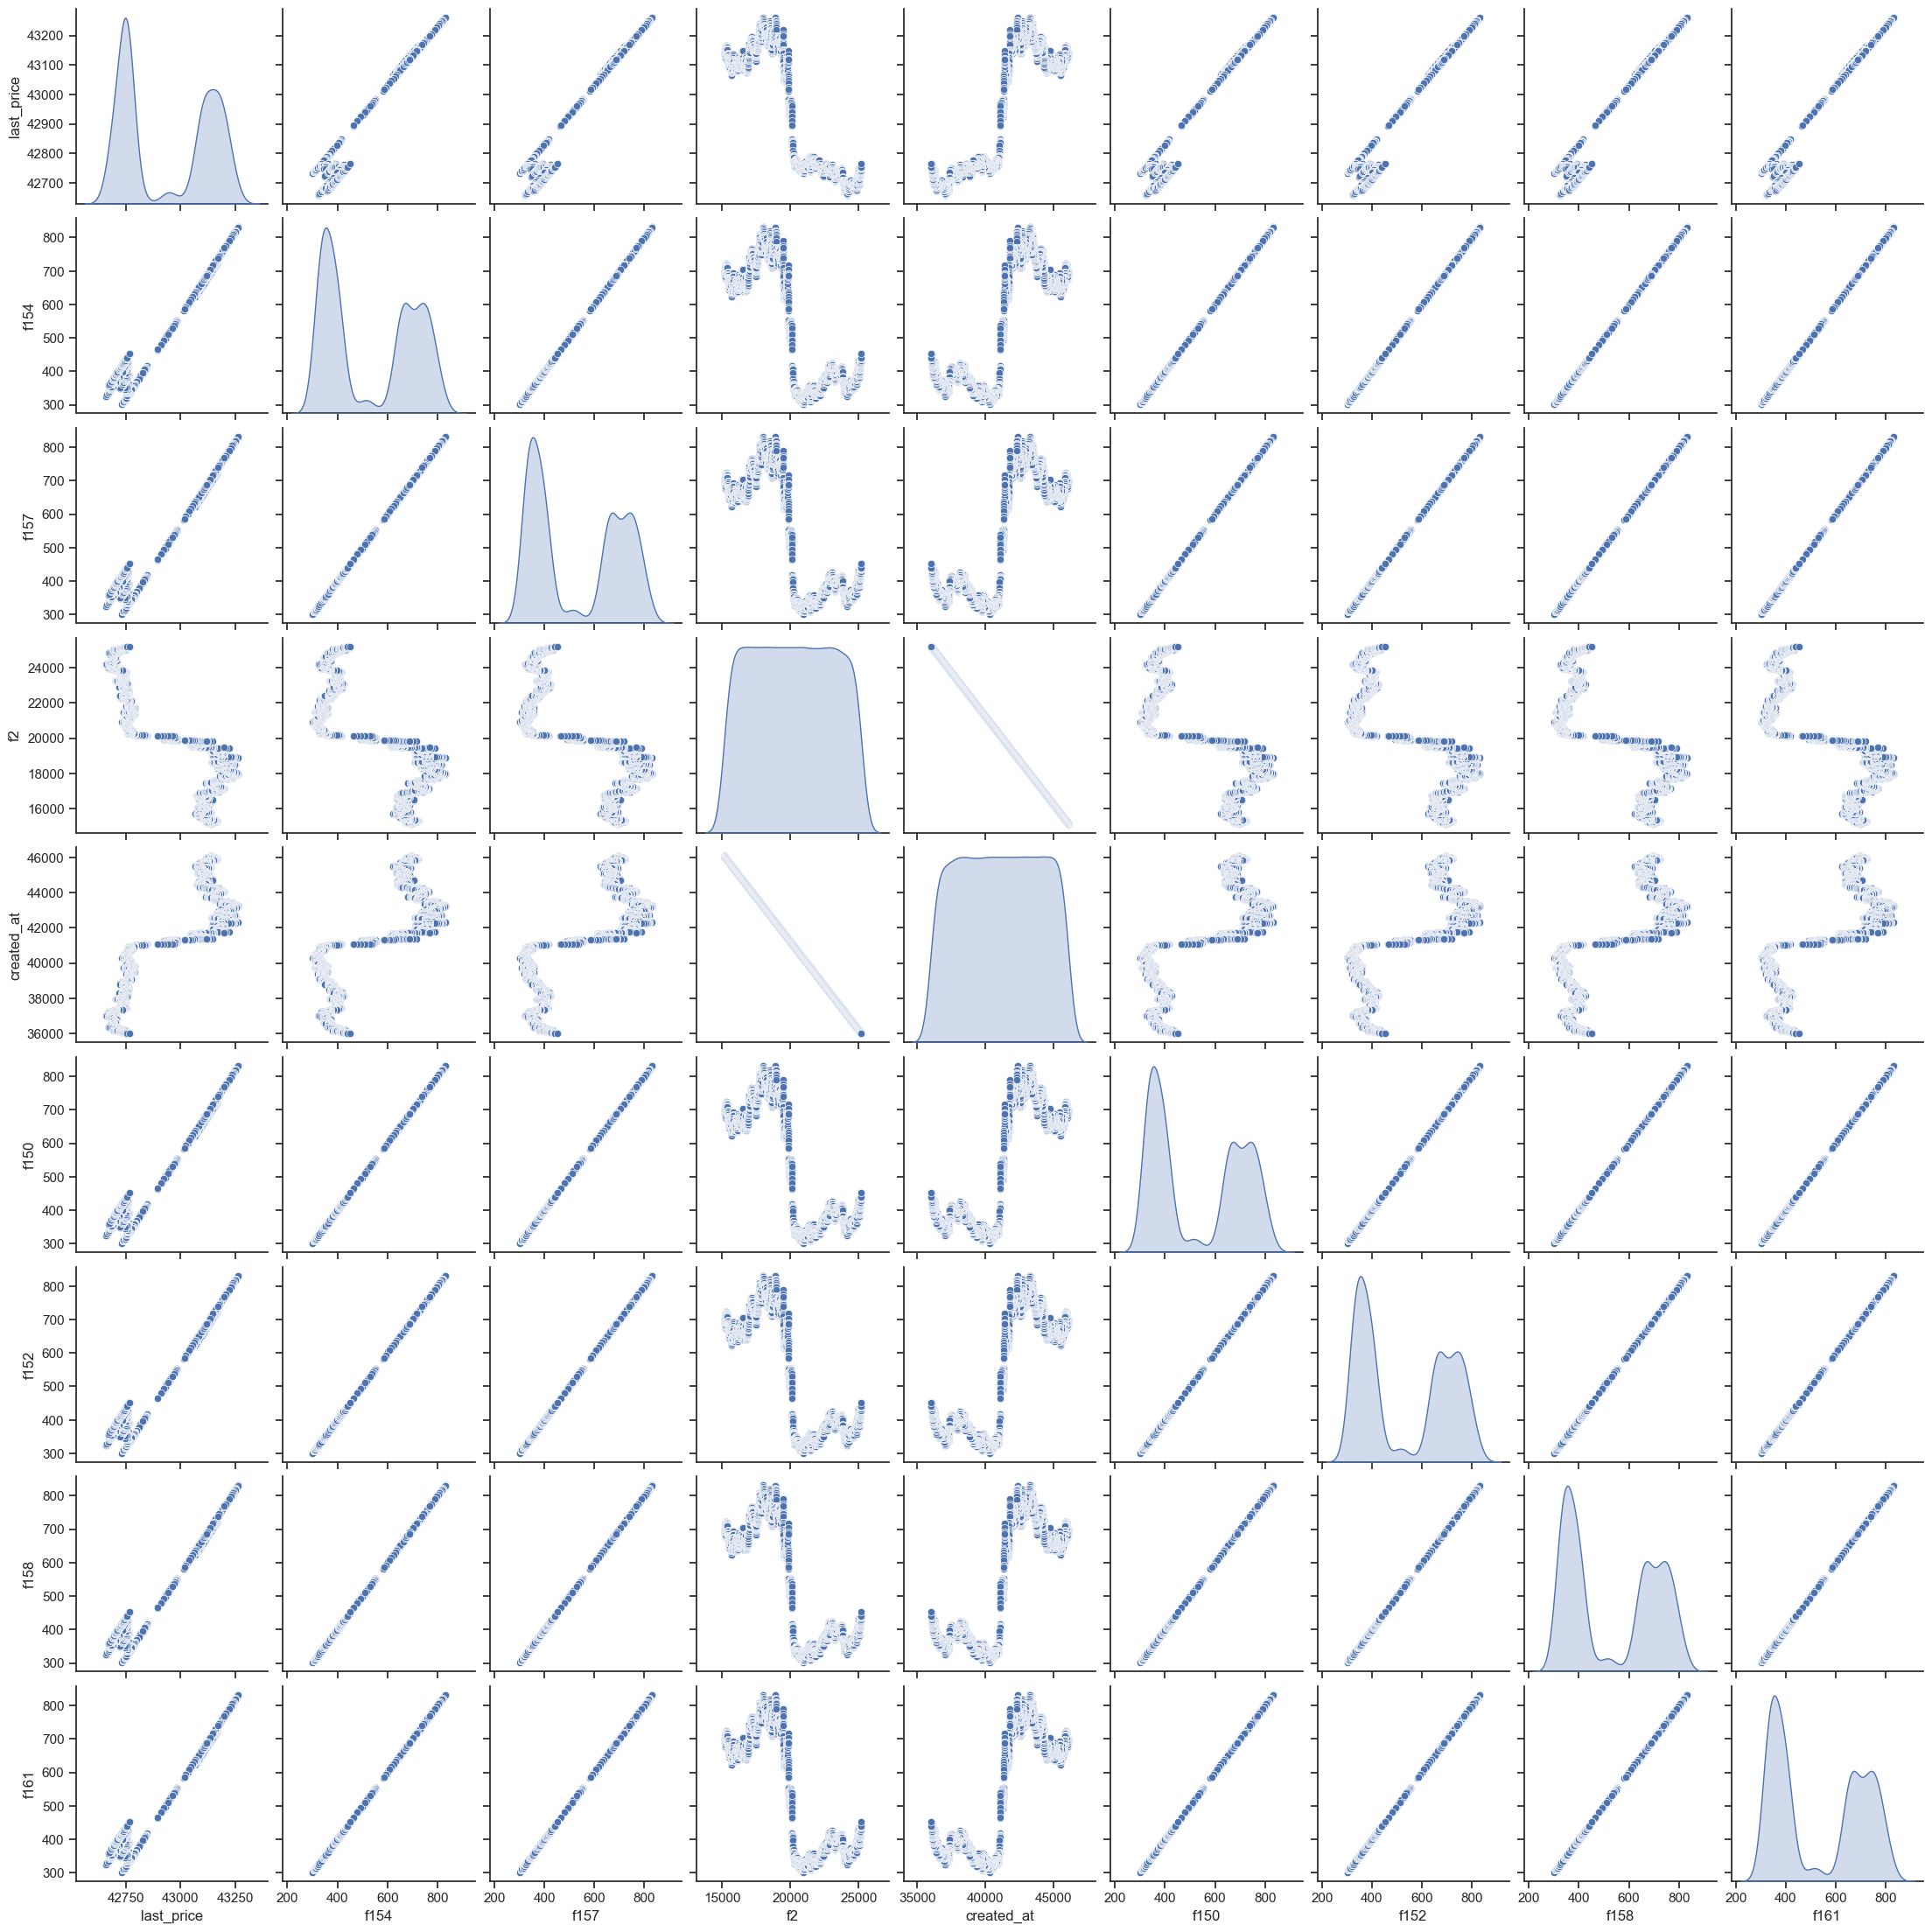

In [329]:
# Pair Plot with the kernel density plots
sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde")

plt.show()


## Scatter Plot of Final Features

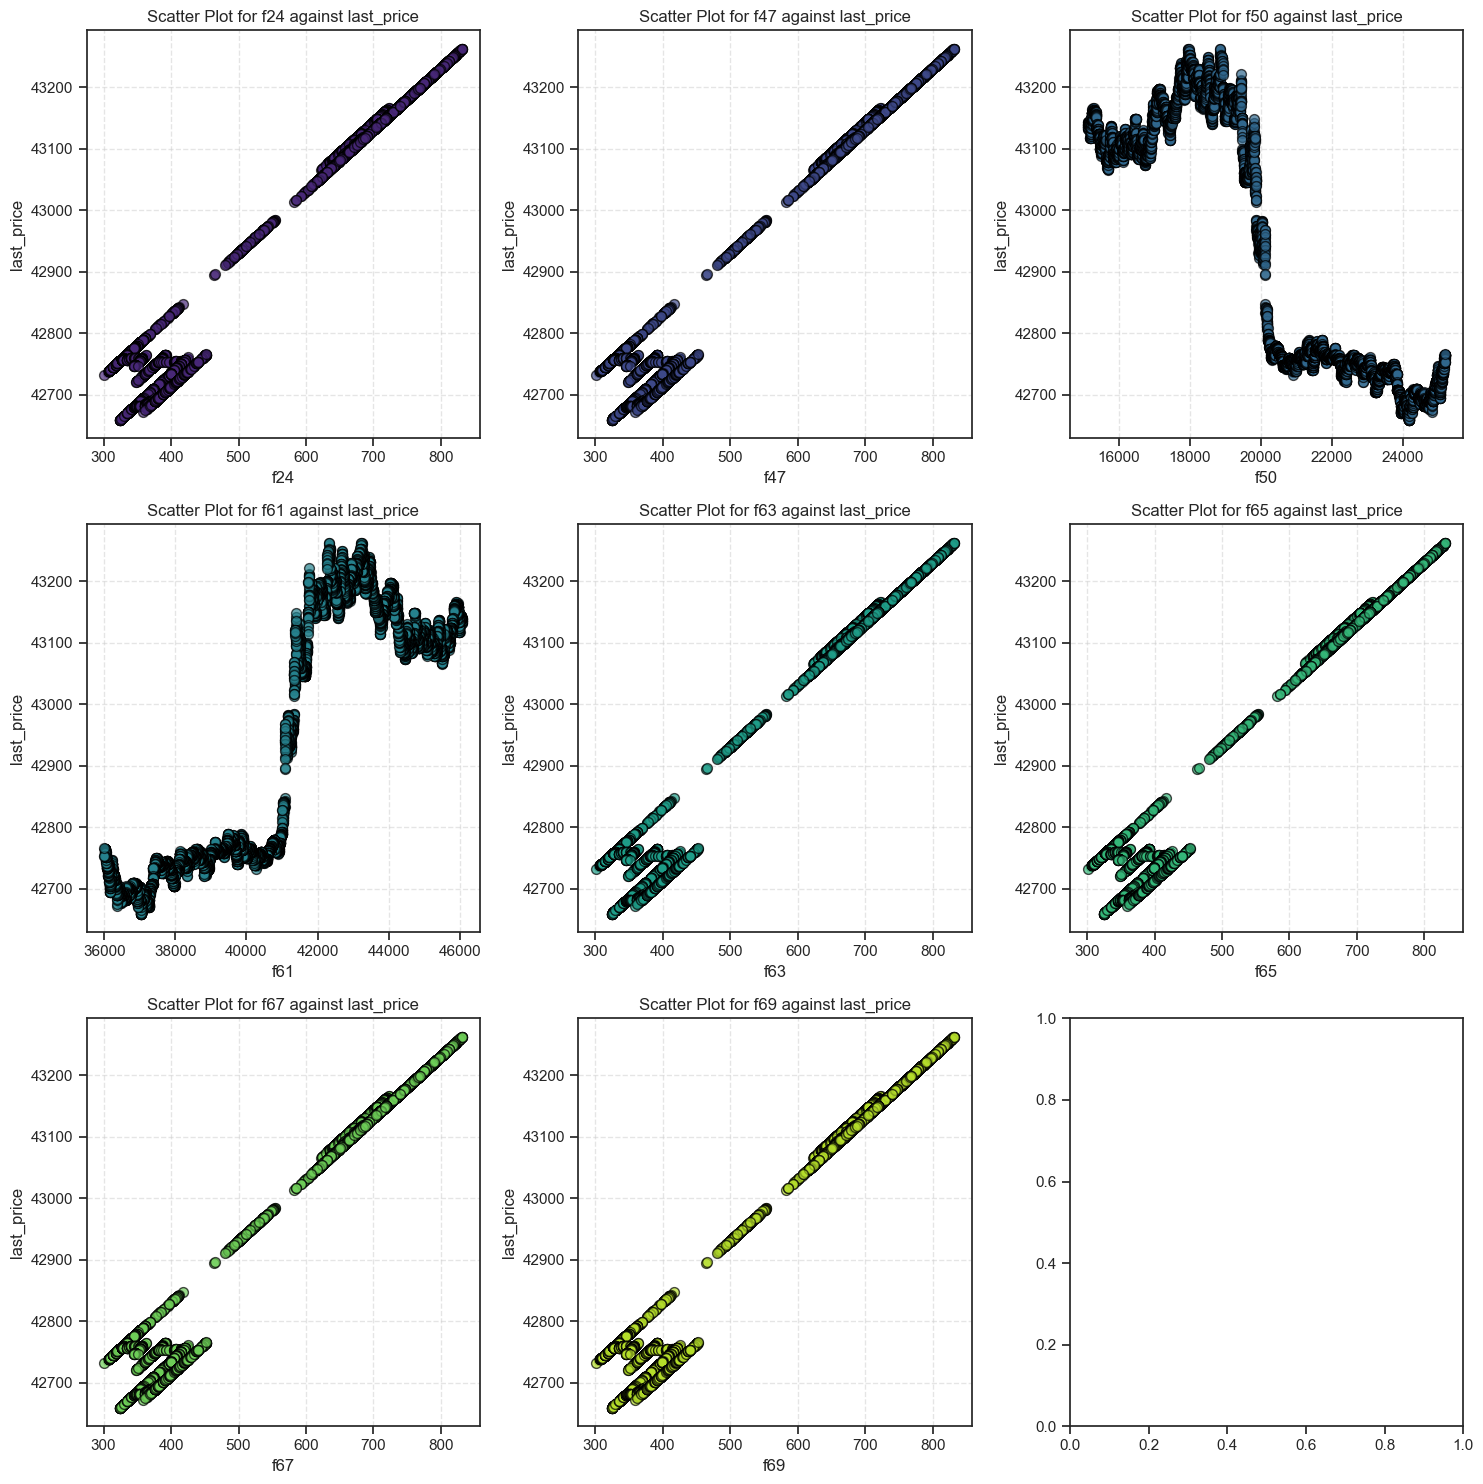

In [330]:
# # Plot all the data
# sns.pairplot(data, hue="target_names", markers=["o", "s", "D"])
# plt.show()# Assuming x and y are your dataframes or arrays
num_features = X.shape[1]
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

# Use a seaborn color palette for a more appealing look
colors = sns.color_palette("viridis", num_features)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

# Loop through each column and plot the scatter plot in the corresponding subplot
for feature_index, ax in enumerate(axes):
    if feature_index < num_features:
        chosen_feature = X.iloc[:, feature_index]

        # Customize scatter plot
        ax.scatter(chosen_feature, y, color=colors[feature_index], edgecolors='black', alpha=0.7, s=50)

        # Add grid lines
        ax.grid(True, linestyle='--', alpha=0.5)

        # Set labels and title
        ax.set_xlabel(f'{zero_columns[feature_index]}')
        ax.set_ylabel('last_price')
        ax.set_title(f'Scatter Plot for {zero_columns[feature_index]} against last_price')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Train Test Split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model on New Data Set

In [332]:
# Create a RandomForestRegressor instance
rf_model = RandomForestRegressor()

# Fit the model to your training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [333]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(data.columns, feature_importances):
    print(f"{feature}: {importance}")

last_price: 0.17542686315183822
f154: 0.10099587198190874
f157: 0.00978161692299846
f2: 0.008544818966694312
created_at: 0.20451638206469386
f150: 0.1193921085711309
f152: 0.21490263906964532
f158: 0.1664396992710901


In [334]:
predictions  = rf_model.predict(X_train)

In [335]:
mae = mean_absolute_error(y_train, predictions)
print(f"Mean Absolute Error for Training Data: {mae:.2f}")

Mean Absolute Error for Training Data: 0.03


In [336]:
predictions  = rf_model.predict(X_test)

In [337]:
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error for Test Data: {mae:.2f}")

Mean Absolute Error for Test Data: 0.07


## Train the Linear Regression Model

https://chat.openai.com/share/8292b71c-7db0-4f8b-82a1-aead6d9aebb4

Linear Regression is effected , as we have selected the more correlated features ,Linear Regression is more sensitive to it
when I use the Polynomial Features (Feature Engineering) , it is performing well.

### Train the Linear Regression Model On the Final Data Set

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [339]:
# Create a linear regression model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [340]:
# Get feature importances
feature_importances = loaded_rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(data.columns, feature_importances):
    print(f"{feature}: {importance}")

last_price: 0.0010076541559621165
f154: 0.0026472019138840653
f157: 2.9133601816003924e-06
f2: 0.003366068691640335
created_at: 1.1558337404673593e-06
f150: 6.861990150044223e-08
f152: 4.873839809123762e-08
f158: 3.278982565375229e-08
f161: 9.91359972654213e-08


In [341]:
# Make predictions on the test data
y_pred = model.predict(X_train_scaled)
# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f'Mean Squared Error for the Train Data: {mse}')


# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for the Test Data: {mse}')

Mean Squared Error for the Train Data: 496.30399981015745
Mean Squared Error for the Test Data: 503.13564111374166


### Train the Linear Regression Model on the Polynomial features

In [342]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model.fit(X_train_poly, y_train)

LinearRegression()

In [343]:
# Make predictions on the test data
y_pred = model.predict(X_train_poly)
# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error for the Train Data: {mse}')


# Make predictions on the test data
y_pred = model.predict(X_test_poly)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for the Test Data: {mse}')

Mean Squared Error for the Train Data: 30.0368740936608
Mean Squared Error for the Test Data: 31.045020076424773


### Train the Linear Regression on the Original Dataset(All Column/Features)

In [364]:
# Our data set <<Features>> <<Labels>>

X_custom = same_data.iloc[:, 1:same_data.shape[1]]
y_custom = same_data.iloc[:, 0]
X_custom.shape, y_custom.shape

X_custom = scaler.fit_transform(X_custom)

X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler_custom = StandardScaler()
X_train_scaled_custom = scaler_custom.fit_transform(X_train_custom)
X_test_scaled_custom = scaler_custom.transform(X_test_custom)

# Create a linear regression model
model_custom = LinearRegression()
# Train the model on the training data
model_custom.fit(X_train_scaled_custom, y_train_custom)

# Make predictions on the train data
y_pred_train_custom = model_custom.predict(X_train_scaled_custom)
# Evaluate the model for train data
mse_train_custom = mean_squared_error(y_train_custom, y_pred_train_custom)
r2_train_custom = r2_score(y_train_custom, y_pred_train_custom)
print(f'Mean Squared Error for the Train Data: {mse_train_custom}')

# Make predictions on the test data
y_pred_test_custom = model_custom.predict(X_test_scaled_custom)
# Evaluate the model for test data
mse_test_custom = mean_squared_error(y_test_custom, y_pred_test_custom)
print(f'Mean Squared Error for the Test Data: {mse_test_custom}')


Mean Squared Error for the Train Data: 17.042679975037228
Mean Squared Error for the Test Data: 17.555054145477822


In [365]:
# Get the coefficients (weights) of the features
coefficients = model_custom.coef_

# Print feature importances
for feature, coefficient in zip(same_data.columns, coefficients):
    print(f"{feature}: {coefficient}")


last_price: -1591.5880102368899
id: 2159.416873309603
created_at: -9.199126372425326
f1: 519.1338785446494
f2: 792288764354.8544
f3: 1032975315535.8185
f4: -592178736786.6328
f5: 0.17937417223964758
f6: 0.12917681949767257
f7: 0.9198862755280857
f8: 0.0644940530417557
f9: 3.5597737108176375
f10: 2.226566465826835
f11: -0.23873761259253
f12: -1.693309521799506
f13: -2.655168175473193
f14: 36.27761375687459
f15: 238621285100.22958
f16: -238621285128.36945
f17: -1.2660463938596251
f18: 0.2522944351867551
f19: -11.065580315841316
f20: 30.858588564236356
f21: -392972212813.63745
f22: 394086518085.08954
f23: -205878852240.93875
f24: 32.66788105262691
f25: -121.2882181656457
f26: -11197573589.198494
f27: 13832149426.144041
f28: 81.30057107065963
f29: -8004695681.762661
f30: -463.53753028672986
f31: -311.7140197753906
f32: -83.39370727539062
f33: -309.7622375488281
f34: 5185170136.592407
f35: 339.908203125
f36: -102.60662841796875
f37: 81.6800765991211
f38: -201.51776123046875
f39: -568.283569